In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import matplotlib as mpl

from matplotlib import rc
import seaborn as sns
custom_params = {
    "xtick.direction": "in",
    "ytick.direction": "in",
    "lines.markeredgecolor": "k",
    "lines.markeredgewidth": 0.3,
    "figure.dpi": 200,
    "text.usetex": True,
    "font.family": "serif",
}

sns.set_theme(context = "notebook", style="ticks", rc=custom_params)

BlueUB = (0, 157/255, 224/255)
BrownUB = (68/255, 58/255, 49/255)

Text(0.85, 0.94, '(d)')

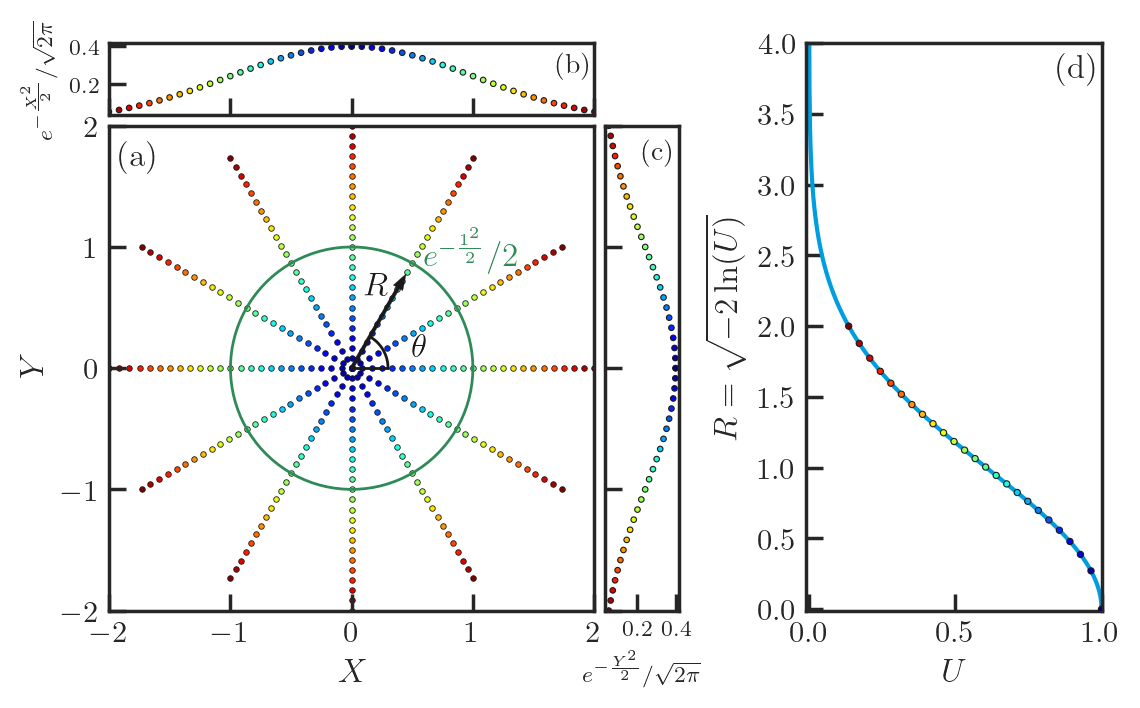

In [3]:
theta = np.linspace(0, 2*np.pi, 100)

fig = plt.figure(figsize = (6.6, 6.5/1.68))
gs = fig.add_gridspec(60, 100,  
                      # width_ratios=(4, 1, 1, 4), 
                      # height_ratios=(1, 4),
                      left=0.1, 
                      right=0.9, 
                      bottom=0.1, 
                      top=0.9,
                      wspace=0.05, 
                      hspace=0.04,
                     )
N=25

#####################
ax_histx = fig.add_subplot(gs[:7, 6:52])
x = np.linspace(0, 2, N)
c=[mpl.colormaps["jet"](i) for i in np.linspace(0,1,N)]
ax_histx.scatter(x,  (1/np.sqrt(2*np.pi))*np.exp(-x**2/2), marker = 'o',  color=c, edgecolor = 'k', s=4, linewidths=0.4) #Problème techinque pour multiplier l'exponentielle par (1/np.sqrt(2*np.pi))* 
ax_histx.scatter(-x,  (1/np.sqrt(2*np.pi))*np.exp(-x**2/2), marker = 'o',  color=c, edgecolor = 'k', s=4, linewidths=0.4) #--> le subplot s'ecrase donc correction manuelle pour que le plot reste symetrique
ax_histx.set_xlim([-2, 2])
# ax_histx.set_xticklabels([])
ax_histx.set_xticks([-2, -1, 0, 1, 2], labels=[])
ax_histx.tick_params(axis='y', labelsize=8)
ax_histx.set_ylabel(r"$e^{-\frac{X^2}{2}}/\sqrt{2 \pi} $", fontsize=8)
ax_histx.text(0.92, 0.6, r"(b)", transform=ax_histx.transAxes, fontsize=10)


######################
ax1 = fig.add_subplot(gs[8:55, 5:53])
r = np.linspace(0, 2, N)
t = np.array([0, np.pi/6, 2*np.pi/6, 3*np.pi/6, 4*np.pi/6, 5*np.pi/6, 6*np.pi/6, 7*np.pi/6, 8*np.pi/6, 9*np.pi/6, 10*np.pi/6, 11*np.pi/6])
c = [mpl.colormaps["jet"](i) for i in np.linspace(0,1,N)]
for cc,rr in zip(c,r):
    a = rr*np.cos(t)
    b = rr*np.sin(t)
    ax1.plot(a, b, "o", color=cc, markersize=2)
ax1.set_aspect(1)
ax1.set(
    xlabel = r"$X$",
    ylabel = r"$Y$",
    xlim = (-2, 2),
    ylim = (-2, 2),
    xticks = (-2, -1, 0, 1, 2),
    yticks = (-2, -1, 0, 1, 2),
)
ax1.text(0.02, 0.92, r"(a)", transform=ax1.transAxes)
#Tracé du vecteur R d'angle phi
rayon = 0.3
phi = 2*np.pi/6
angle = np.linspace(0, phi, 50) #arc de cercle de 0 à 2pi/6
ax1.plot(1*np.cos(theta),  1*np.sin(theta), color="seagreen", linewidth=1) #cercle unité
ax1.text(0.6, 0.85, r"$e^{-\frac{1^2}{2}}/2 $", color="seagreen") #densité de R=1 ~ E(1/2)
ax1.arrow(0., 0., 0.9*np.cos(phi), 0.9*np.sin(phi), width = 0.03, linewidth=0.1, color="k", zorder=3, length_includes_head=True)#Vecteur R
ax1.text(0.1, 0.6, r"$R$", color="k", zorder=3) 
ax1.plot(rayon*np.cos(angle), rayon*np.sin(angle), color="k", linewidth=1, zorder=3)
ax1.plot(np.linspace(0,rayon,10), np.zeros(10), "k-", linewidth=1 ) 
ax1.text(0.5, 0.1, r"$\theta$", color="k", zorder=3)
ax1.xaxis.zorder=3
ax1.yaxis.zorder=3


#####################
ax_histy = fig.add_subplot(gs[8:55, 53:60])
y = np.linspace(0, 2, N)
c=[mpl.colormaps["jet"](i) for i in np.linspace(0,1,N)]
ax_histy.scatter( (1/np.sqrt(2*np.pi))*np.exp(-y**2/2), y, marker = 'o',  color=c, edgecolor = 'k', s=4, linewidths=0.4)
ax_histy.scatter( (1/np.sqrt(2*np.pi))*np.exp(-y**2/2), -y, marker = 'o',  color=c, edgecolor = 'k', s=4, linewidths=0.4)
ax_histy.set_ylim([-2, 2])
ax_histy.set_yticklabels([])
ax_histy.tick_params(axis='x', labelsize=8)
ax_histy.set_xlabel(r"$e^{-\frac{Y^2}{2}}/\sqrt{2 \pi} $", fontsize=8)
ax_histy.text(0.5, 0.93, r"(c)", transform=ax_histy.transAxes, fontsize=10)


##################################
ax2 = fig.add_subplot(gs[:55, 72:])
u = np.linspace(1e-4, 1, 1000)
uu = np.linspace(np.exp(-2), 1, N)
ax2.plot(u, np.sqrt(-2*np.log(u)), "-", color=BlueUB)
ax2.scatter(uu[::-1], np.sqrt(-2*np.log(uu[::-1])), marker = 'o',  color=c, edgecolor = 'k', s=5, linewidths=0.4, zorder=3)
ax2.set(
    xlabel = r"$U$",
    ylabel = r"$R = \sqrt{-2 \ln(U)}$",
    xlim = (-0.01,1),
    ylim = (-0.01, 4),
)
ax2.text(0.85, 0.94, r"(d)", transform=ax2.transAxes)
# plt.savefig("BoxMuller_methode.pdf")

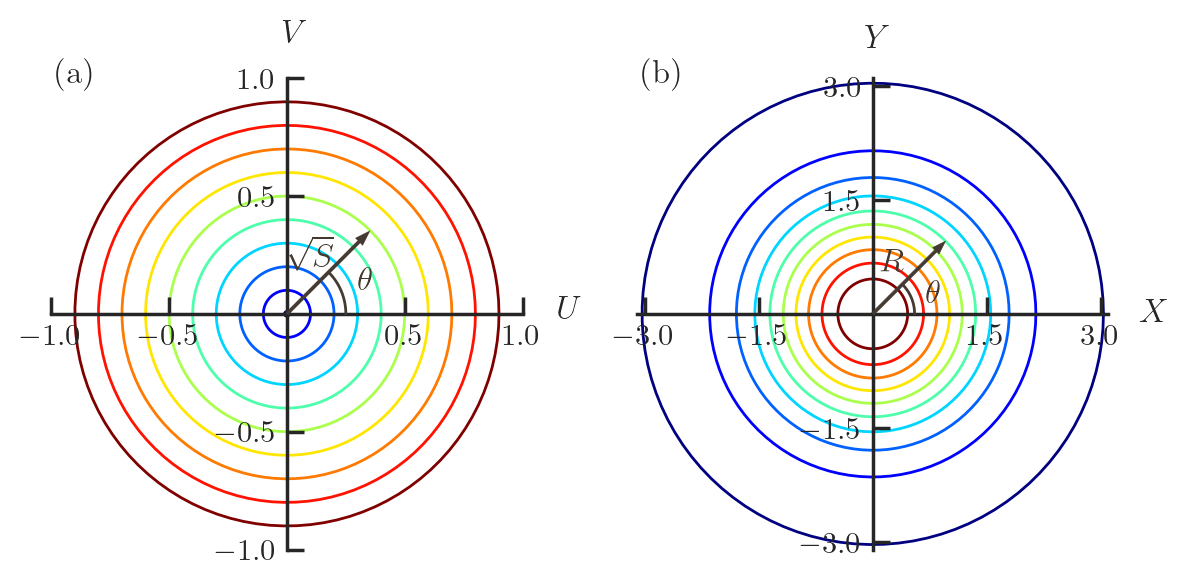

In [4]:
S = np.array([0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]) #choix des différent rayon de cercle uniforme S
R = np.sqrt(-2*np.log(S)) #transformation de Box Muller 

colors= [mpl.colormaps["jet"](i) for i in np.linspace(0,1,len(R))]

#Choix des vecteurs respectif tracés
Splot = S[5] 
Rplot = R[len(S)-1-5]

#PLOTS
fig = plt.figure(figsize = (1.8*3.375, 1.5*3.375/1.68),  tight_layout=True)
ax1 = plt.subplot(121)
for color,s in zip(colors,S):
    a = s*np.cos(theta)
    b = s*np.sin(theta)
    ax1.plot(a, b, color=color, linewidth=1)
ax1.set_aspect(1)
ax1.set(
    xlim = (-1, 1),
    ylim = (-1, 1),
    xticks = (-1.0, -0.5,0.5, 1.0),
    yticks = (-1.0, -0.5, 0.5, 1.0),
)
ax1.text(1.15, -0.02, r"$U$")
ax1.text(-0.02, 1.15, r"$V$")
ax1.text(0.01, 0.99, r"(a)", transform=ax1.transAxes)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax1.spines['left'].set_position('center')
ax1.spines['bottom'].set_position('center')
# Eliminate upper and right axes
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')

#Tracé du vecteur S d'angle \theta
ax1.arrow(0., 0., Splot*np.cos(np.pi/4), Splot*np.sin(np.pi/4), width = 0.015, linewidth=0.05, color=BrownUB, zorder=3, length_includes_head=True)
ax1.text(0., 0.2, r"$\sqrt{S}$", color=BrownUB, zorder=3)
rayon = 0.25
angle = np.linspace(0, np.pi/4, 50)
ax1.plot(rayon*np.cos(angle), rayon*np.sin(angle), color=BrownUB, linewidth=1, zorder=3)
ax1.text(0.3, 0.1, r"$\theta$", color=BrownUB, zorder=3)
ax1.xaxis.zorder=3
ax1.yaxis.zorder=3


ax2 = plt.subplot(122)
for color,r in zip(colors,R):
    a = r*np.cos(theta)
    b = r*np.sin(theta)
    ax2.plot(a, b, color=color, linewidth=1)
ax2.set_aspect(1)
ax2.set(
    xlim = (-3.1, 3.1),
    ylim = (-3.1, 3.1),
    xticks = (-3, -1.5, 1.5, 3),
    yticks = (-3,-1.5, 1.5,3),
)
ax2.text(3.5, -0.1, r"$X$")
ax2.text(-0.1, 3.5, r"$Y$")
ax2.text(0.01, 0.99, r"(b)", transform=ax2.transAxes)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax2.spines['left'].set_position('center')
ax2.spines['bottom'].set_position('center')
# Eliminate upper and right axes
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')

#Tracé du vecteur S d'angle \theta
ax2.arrow(0., 0., Rplot*np.cos(np.pi/4), Rplot*np.sin(np.pi/4), width = 0.04, linewidth=0.2, color=BrownUB, zorder=3, length_includes_head=True)
ax2.text(0.1, 0.55, r"$R$", color=BrownUB, zorder=3)
rayon = 0.55
angle = np.linspace(0, np.pi/4, 50)
ax2.plot(rayon*np.cos(angle), rayon*np.sin(angle), color=BrownUB, linewidth=1, zorder=3)
ax2.text(0.7, 0.15, r"$\theta$", color=BrownUB, zorder=3)
ax2.xaxis.zorder=3
ax2.yaxis.zorder=3

# plt.savefig("Marsaglia_BoxMuller_methode.pdf")

## Distribution random_gaussian() fonction :

In [5]:
sys.path.append("Codes/Overdamped_Langevin_Python/")

from Overdamped_Langevin import random_gaussian

In [6]:
sigma = 1
N = 10000
Test_gauss = np.zeros(N)
for i in range(len(Test_gauss)):
    Test_gauss[i] = random_gaussian() * sigma


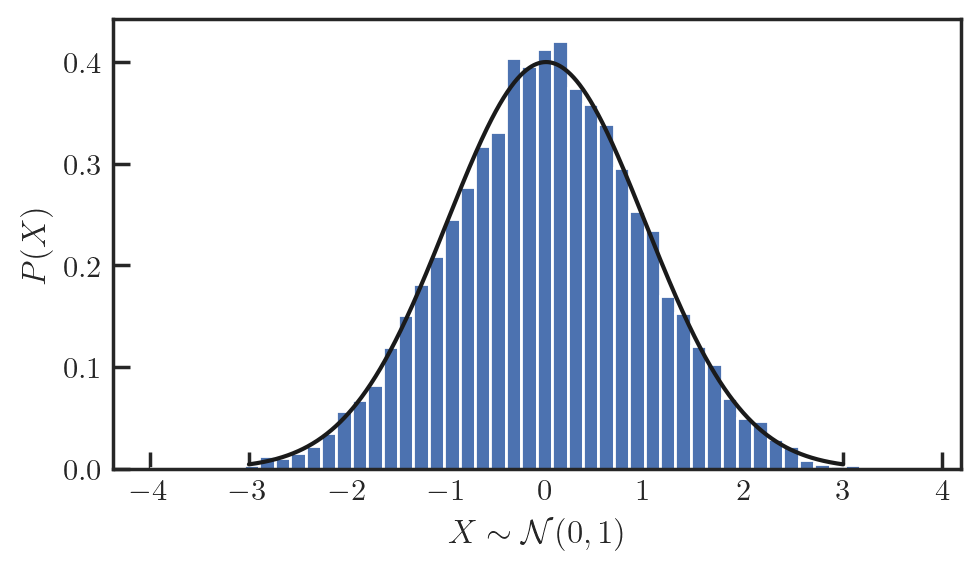

In [12]:
plt.figure(figsize=(1.5 * 3.375, 1.5 * 3.375 / 1.68), tight_layout=True)
ax1 = plt.subplot(111)

ax1.hist(Test_gauss, bins=50, density=True)
x = np.linspace(-3 * sigma, 3 * sigma, 1000)
p_gauss = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-x ** 2 / (2 * sigma ** 2))
ax1.plot(x, p_gauss / np.trapz(p_gauss, x), "k-")
ax1.set_xlabel(r"$X \sim \mathcal{N}(0,1)$")
ax1.set_ylabel(r"$P(X)$")
plt.savefig("DistributionRandomGaussian-BM.pdf")